<a href="https://colab.research.google.com/github/ninowwwup/Case_de_Estudos_Udemy./blob/main/Case_de_Estudos_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🟡Case de Estudo

Importando as Libs para análise dos dados

In [53]:
import pandas as pd

Importando o database 

In [54]:
# Database em .xlsx (Excel)
# Por conter várias abas no dataset precisamos definor qual base iremos trabalhar inicialmente utilizando o 'sheet_name='

df_clientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
df_lojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
df_pagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')
df_produtos= pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
df_vendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')

# 📶Análise Exploratória






> Amostras e Filtros

> Observando a Coluna *'df_clientes'*







In [55]:
# Amostragem Simples Aleatória com 'sample()'

df_clientes.sample(5)

,id,nome,sexo,dt_nasc
743,744,Amanda Araujo,F,5/29/2002
509,510,Julieta Barros,F,6/17/1989
4,5,Gabrielle Martins,F,5/6/1953
808,809,Manuela Goncalves,F,2/28/1949
60,61,Laura Barbosa,F,10/11/1969


In [56]:
# Observando se há dados nulos nas COLUNAS

df_clientes.isnull().any()

id         False
nome        True
sexo        True
dt_nasc     True
dtype: bool

In [57]:
# Somando os dados nulos das COLUNAS

df_clientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

Fazendo um filtro que verifica os dados nulos por LINHA EM CADA COLUNA

In [58]:
df_clientes[df_clientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [59]:
# Filtrando apenas a coluna 'Sexo', observamos a qtd de valores dentro dessa coluna

df_clientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [60]:
# Observando a aba produtos

df_produtos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


- Observamos que nesse boxplot acima de 3M indicando um Outlier

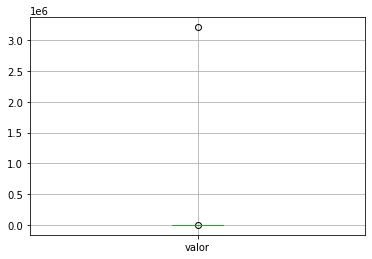

In [61]:
df_produtos.boxplot(column=['valor'])

- Através do filtro obtivemos o dado que está com valor discrepante

In [62]:
# Filtrando o valor que esteja exorbitantemente alto indicando um outlier

df_produtos[df_produtos.valor>3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


- Isolando apenas o outlier (sem dropar) e utilizando o filtro, agora temos as informações dos dados corretamente

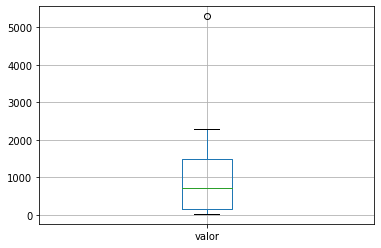

In [63]:
df_produtos[df_produtos.valor < 3000000].boxplot(column=['valor'])

- Agora vamos observar melhor o dado com Id 10, dentro do dataframe de Vendas

In [64]:
# Observamos que há algumas vendas 

df_vendas[df_vendas.id_produto==10]

,id,id_cliente,id_loja,id_produto,dt_venda
7,8,543,10,10,2018-01-06
9,10,724,3,10,2018-01-07
20,21,270,2,10,2018-01-12
22,23,665,10,10,2018-01-12
28,29,299,5,10,2018-01-13
...,...,...,...,...,...
2906,2907,907,2,10,2020-08-23
2946,2947,387,3,10,2020-09-10
2956,2957,35,7,10,2020-09-14
2966,2967,405,3,10,2020-09-17


In [65]:
# Somando as vendas do ID 10

df_vendas[df_vendas.id_produto==10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64



> Dessa forma observamos que existe 182 vendas com essa Id 10, sendo assim não podemos simplismente deletar esse dado, deveras uma colsulta deve ser feita ao cliente sobre esse as informações desse dado



In [66]:
# Observando agora a tabela de vendas

df_vendas

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05
...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27
2996,2997,586,8,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


In [67]:
# Vendo se ha dados faltantes

df_vendas.isnull().sum()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [68]:
df_vendas.describe()

,id,id_cliente,id_loja,id_produto
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,500.763667,4.538333,4.435000
std,866.169729,285.322282,2.922221,2.511018
min,1.000000,1.000000,1.000000,1.000000
25%,750.750000,254.750000,2.000000,3.000000
50%,1500.500000,503.500000,4.000000,3.000000
75%,2250.250000,742.000000,7.000000,6.000000
max,3000.000000,1000.000000,10.000000,10.000000


In [69]:
# Observando agora a tabela de Pagamentos

df_pagamentos

,id,id_venda,dt_pgto
0,1,1,2018-01-24
1,2,2,2018-02-17
2,3,3,2018-02-14
3,4,5,2018-01-23
4,5,7,2018-02-15
...,...,...,...
2067,2068,2990,2020-10-04
2068,2069,2992,2020-10-10
2069,2070,2994,2020-10-09
2070,2071,2996,2020-10-17


In [70]:
# Vendo se ha dados faltantes

df_pagamentos.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

In [71]:
df_pagamentos.describe()

,id,id_venda
count,2072.000000,2072.000000
mean,1036.500000,1491.731660
std,598.279199,864.865583
min,1.000000,1.000000
25%,518.750000,746.250000
50%,1036.500000,1501.500000
75%,1554.250000,2220.500000
max,2072.000000,2997.000000


# 📶 DATA CLEANNING

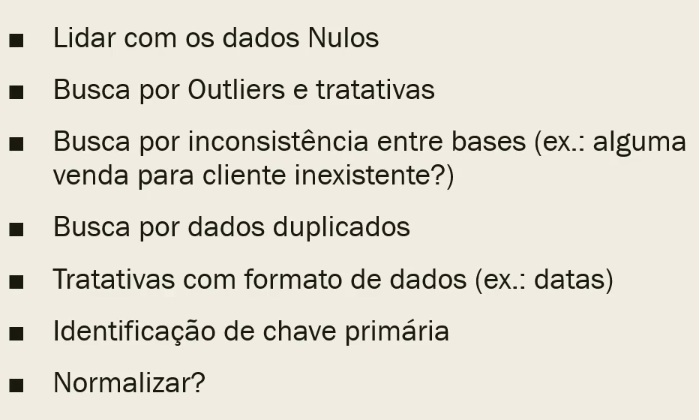

# **❌ Dados Nulos**

- Utilizando o .loc que acessa um registro dado uma linha e uma coluna
- O comando .loc é comumente utilizado quando se que acessar um registro, modificar, ou substitui-lo

In [72]:
df_clientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


In [73]:
# Substituindo os registro nulos dentro da coluna 'nome' que estão como Nan por 'Sem nome'
# Substituindo os registro nulos dentro da coluna 'sexo' por 'O' (de Outros)
# Substituindo os registro nulos dentro da coluna 'df_nasc' por uma data que ficará de fácil análise posteriormente

df_clientes.loc[df_clientes.nome.isnull(),'nome'] = 'Sem nome'
df_clientes.loc[df_clientes.sexo.isnull(),'sexo'] = 'O'
df_clientes.loc[df_clientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2020'

In [74]:
# Acessando os valores utilizando o index

df_clientes.loc[[269, 287], :]

,id,nome,sexo,dt_nasc
269,270,Sem nome,M,1/1/2020
287,288,Victor Ribeiro,O,12/17/1974


- Agora verificamos se ainda há dados nulos em todos os Dataframes

In [75]:
# Verificando se ainda há dados nulos em df_clientes

df_clientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [76]:
# Verificando se ainda há dados nulos em df_lojas

df_lojas.isnull().sum()

id        0
cidade    0
dtype: int64

In [77]:
# Verificando se ainda há dados nulos em df_vendas

df_vendas.isnull().sum()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [78]:
# Verificando se ainda há dados nulos em df_pagamentos

df_pagamentos.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

# **❌ Outliers**